In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from missingna

2022-09-29 17:50:05.921664: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-29 17:50:05.921838: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [9]:
csgo_data = pd.read_csv("../data/csgo_round_snapshots.csv")
csgo_data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [38]:
csgo_data.columns

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

<AxesSubplot:ylabel='Frequency'>

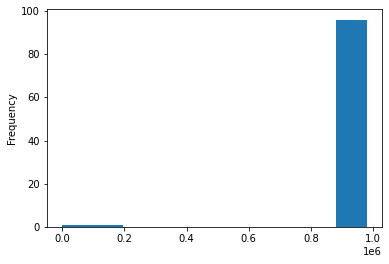

In [18]:
csgo_data.memory_usage().plot(kind = 'hist')

In [20]:
csgo_data.dtypes.value_counts()

float64    94
object      2
bool        1
dtype: int64

## Splitting Features & Target

In [25]:
X = csgo_data.drop(columns = ["round_winner"])
y = csgo_data.round_winner

X.shape , y.shape

((122410, 96), (122410,))

### Transforming the target

In [26]:
y = y.map({"CT": 1 , "T": 0})

(array([0, 1]), array([62406, 60004]))

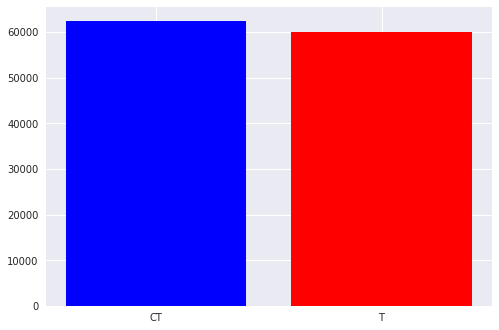

In [32]:
_ , counts = np.unique(y , return_counts = True)

with plt.style.context("seaborn"):
    plt.bar( ["CT" , "T"] , counts , color = ["blue","red"])

### Data Vizualization 

In [61]:
corr_df = csgo_data[csgo_data.columns]\
                .corr()\
                .unstack(level = 1)\
                .to_frame(name = "correlation")\
                .reset_index()\
                .rename(columns = {"level_1": "feature_x" , "level_0": "feature_y"})\
                .query('abs(correlation)>0.5')

In [65]:
corr_df

,feature_y,feature_x,correlation
0,time_left,time_left,1.000000
4,time_left,ct_health,0.684514
5,time_left,t_health,0.678952
13,time_left,ct_players_alive,0.638904
14,time_left,t_players_alive,0.597630
...,...,...,...
8826,t_grenade_molotovgrenade,t_grenade_flashbang,0.818655
8828,t_grenade_molotovgrenade,t_grenade_smokegrenade,0.812387
8832,t_grenade_molotovgrenade,t_grenade_molotovgrenade,1.000000
8928,ct_grenade_decoygrenade,ct_grenade_decoygrenade,1.000000


In [76]:
!pip install missingno

import missingno as msno

<AxesSubplot:>

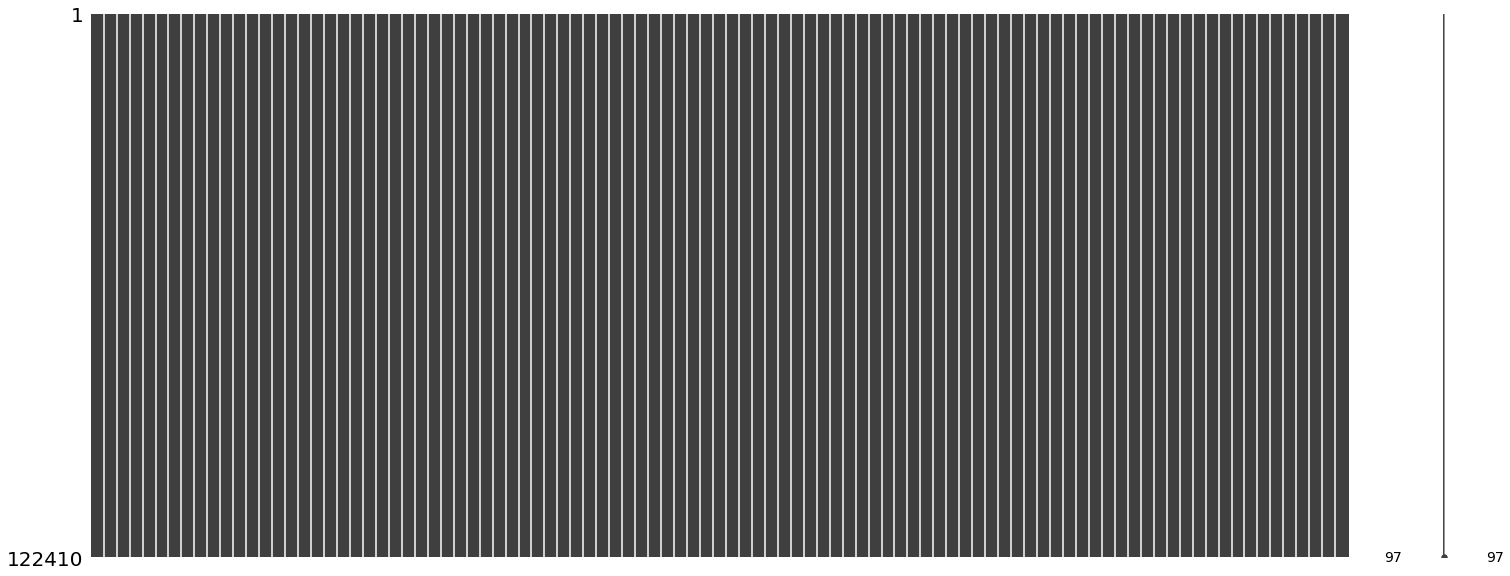

In [78]:
msno.matrix(csgo_data)

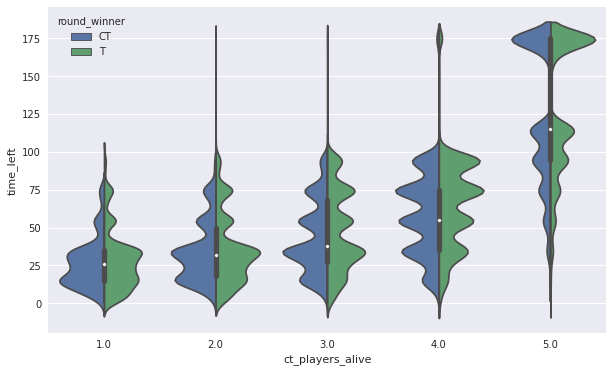

In [46]:
with plt.style.context("seaborn"):
    fig , ax = plt.subplots(nrows = 1 , ncols = 1 , figsize = (10,6))
    sns.violinplot( data = csgo_data,  
                   y = "time_left" , 
                   x = "ct_players_alive", 
                   hue="round_winner", 
                   split=True,
                  ax = ax)
    ax.set_xticks(np.arange(1,6,1))
    ax.set_xlim(0.5,5.5)

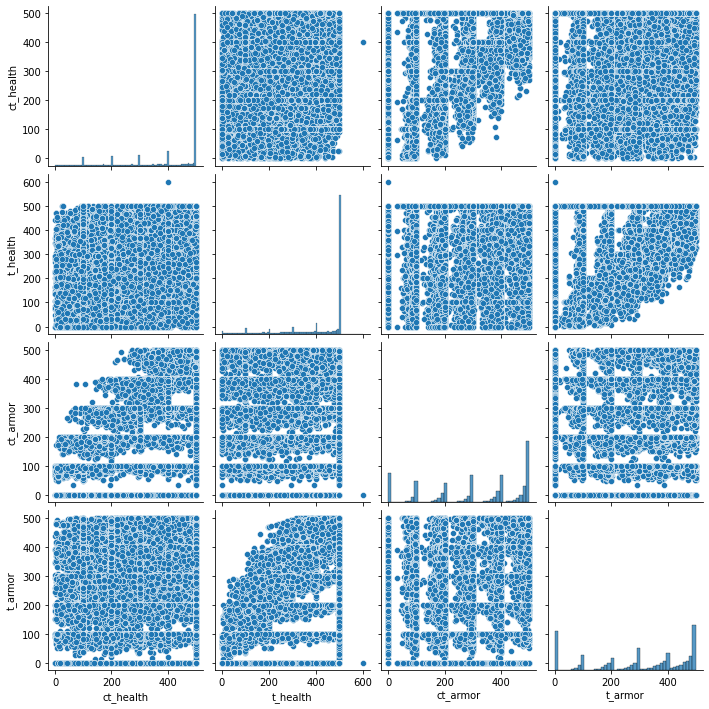

In [68]:
sns.pairplot(csgo_data[["ct_health","t_health","ct_armor","t_armor"]])

### Preprocess Pipeline

In [90]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler , RobustScaler , OneHotEncoder , FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector , make_column_transformer
from sklearn import set_config
set_config(display = 'diagram')

In [70]:
csgo_data.dtypes.value_counts()

float64    94
object      2
bool        1
dtype: int64

In [79]:
csgo_data.select_dtypes(include = ['object']).head(3)

,map,round_winner
0,de_dust2,CT
1,de_dust2,CT
2,de_dust2,CT


In [80]:
csgo_data.select_dtypes(include = ['bool']).head(3)

,bomb_planted
0,False
1,False
2,False


In [101]:
cat_pipe = make_pipeline( OneHotEncoder(handle_unknown = 'ignore') )

preproc_pipe = make_column_transformer( 
         
             (cat_pipe , make_column_selector(dtype_include = object)),
             (RobustScaler() , make_column_selector(dtype_include = np.float64)),
             (FunctionTransformer( lambda x : x.applymap(int) ) , make_column_selector(dtype_include = bool))
         )
preproc_pipe

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce8eef48e0>),
                                ('robustscaler', RobustScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce8eef4190>),
                                ('functiontransformer',
                                 FunctionTransformer(func=<function <lambda> at 0x7fce8edef430>),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fce8eef4c40>)])

In [102]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size =  0.2 , random_state = 0)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((97928, 96), (24482, 96), (97928,), (24482,))

In [103]:
X_train_trans = preproc_pipe.fit_transform(X_train)
X_test_trans = preproc_pipe.transform(X_test)
X_train_trans.shape , X_test_trans.shape

((97928, 103), (24482, 103))

In [109]:
X_train.select_dtypes(include = object).nunique()[0]

8

In [111]:
total_columns = X.shape[1] + 8 - 1
total_columns

103

### Predictive Analytics

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [114]:
accuracies = {}
models = [lambda : LogisticRegression(max_iter = 1000) , DecisionTreeClassifier , RandomForestClassifier , XGBClassifier]

for model in models:
    print(f"Fitting model {model.__name__}..." , flush = True)
    pred_pipe = make_pipeline( preproc_pipe , model() )
    pred_pipe.fit(X_train , y_train)
    accuracies.update( {model.__name__ : pred_pipe.score(X_test , y_test)} )

Fitting model <lambda>...
Fitting model DecisionTreeClassifier...
Fitting model RandomForestClassifier...
Fitting model XGBClassifier...


/home/dollzeta/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:46:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
logistic_regression = 

In [115]:
accuracies

{'<lambda>': 0.7489992647659505,
 'DecisionTreeClassifier': 0.8283636957764888,
 'RandomForestClassifier': 0.8790948451923862,
 'XGBClassifier': 0.8040601258067152}

### Tensorflow Model

In [136]:
from tensorflow.keras import models , layers

def initialize_model(X):
    
    model = models.Sequential()
    
    model.add(layers.Dense(50 , input_dim = X.shape[1] , activation = "relu"))
    model.add(layers.Dense(100 , activation = "relu"))
    model.add(layers.Dense(150 , activation = "relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense( 200 , activation = "relu"))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(50 , activation = "relu"))
    
    ##output layer
    model.add( layers.Dense(1 , activation = "sigmoid"))
    return model

model = initialize_model(X_train_trans)

In [137]:
def compile_model(model):
    model.compile(loss = "binary_crossentropy" , optimizer = "adam" , metrics = ["accuracy"])
    return model

model = compile_model(model)

In [138]:
X_train_trans[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  4.46428571e-04,
         2.85714286e-01,  4.28571429e-01,  0.00000000e+00,
         0.00000000e+00,  4.21232877e-01, -7.98634812e-01,
        -2.32209738e-01,  3.99390244e-01,  7.50000000e-01,
        -6.00000000e-01,  3.33333333e-01,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00, -5.00000000e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [139]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience = 4)

model.fit(X_train_trans , y_train , epochs = 100 , callbacks = [es] , validation_split = 0.2 , batch_size = 64)

Epoch 1/100
1225/1225 [==============================] - 6s 4ms/step - loss: 0.4720 - accuracy: 0.7444 - val_loss: 0.4487 - val_accuracy: 0.7582
Epoch 2/100
1225/1225 [==============================] - 5s 4ms/step - loss: 0.4453 - accuracy: 0.7599 - val_loss: 0.4402 - val_accuracy: 0.7618
Epoch 3/100
1225/1225 [==============================] - 5s 4ms/step - loss: 0.4365 - accuracy: 0.7661 - val_loss: 0.4482 - val_accuracy: 0.7618
Epoch 4/100
1225/1225 [==============================] - 5s 4ms/step - loss: 0.4290 - accuracy: 0.7718 - val_loss: 0.4370 - val_accuracy: 0.7632
Epoch 5/100
1225/1225 [==============================] - 5s 4ms/step - loss: 0.4229 - accuracy: 0.7776 - val_loss: 0.4387 - val_accuracy: 0.7644
Epoch 6/100
1225/1225 [==============================] - 5s 4ms/step - loss: 0.4151 - accuracy: 0.7828 - val_loss: 0.4310 - val_accuracy: 0.7686
Epoch 7/100
1225/1225 [==============================] - 5s 4ms/step - loss: 0.4070 - accuracy: 0.7880 - val_loss: 0.4311 - val_ac

In [140]:
model.save("csgo_tf")

2022-09-29 19:06:34.950571: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: csgo_tf/assets


In [141]:
ls

'CSGO Analytics.ipynb'   csgo_tf/
